시계열
- 시간 순서대로 발생한 데이터의 수열 

안정적인 데이터에서만 미래 예측 가능 == 시계열 데이터의 통계적 특성이 변하지 않는다

1. 데이터를 일정 구간으로 나누었을 때 그 구간이 갖는 평균이 같아야 한다.

2. 데이터를 일정 구간으로 나누었을 때 그 구간이 갖는 표준편차가 같아야 한다.

3. t시점과 (t-1)시점의 공분산과 t시점과 (t+1)시점의 공분산이 같아야 한다.

공분산: 각 확률변수들이 어떻게 퍼져있는지를 나타내는 것
- X의 편차와 Y의 편차를 곱한것의 평균
- Cov(X, Y) > 0    X가 증가 할 때 Y도 증가한다.
- Cov(X, Y) < 0    X가 증가 할 때 Y는 감소한다.
- Cov(X, Y) = 0    공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.

X와 Y의 단위의 크기에 영향을 받는다는 것
그래서 상관계수가 나옴 
절대적 크기에 영향을 받지 않도록 단위화

상관계수 : 
- 상관계수의 절대값은 1을 넘을 수 없다.
- 확률변수 X, Y가 독립이라면 상관계수는 0이다.
- X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1이다.양의 선형관계면 1, 음의 선형관계면 -1

자기공분산:
X(t)와 X(t) 사이의 공분산이 아니라 X(t)와 X(t+h) 사이의 공분산이기 때문. 즉 일정 시차 h 사이를 둔 자기자신과의 공분산

 X가 Stationary한 시계열 변수라는 조건 하에서만
 X(t)와 X(t+h) 사이의 공분산과 X(t-h)와 X(t) 사이의 공분산은 항상 일정

예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.

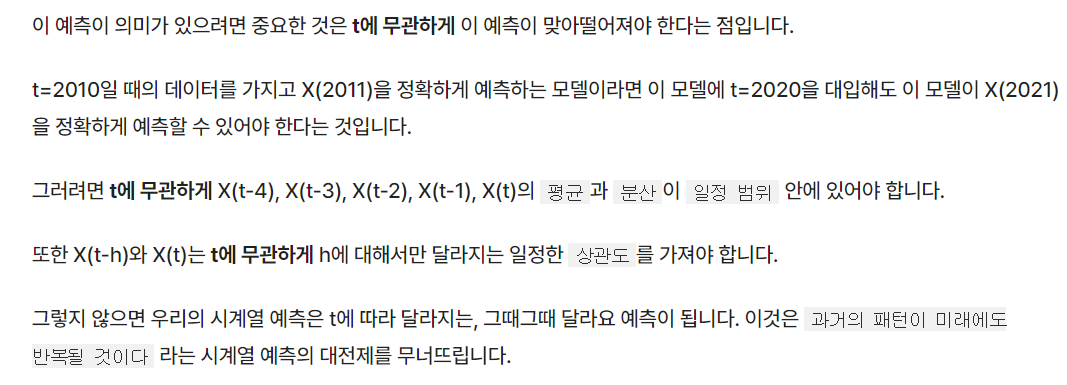

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_path=os.getcwd()+'/daily-min-temperatures.csv'
df=pd.read_csv(csv_path)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


시계열(Time Series)
index로 하는 Series로 표현

In [4]:
df=pd.read_csv(csv_path,index_col='Date',parse_dates=True)
print(type(df))
df.head()

#date 을 인덱스 칼럼으로 지정

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
ts1=df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

시계열 시각화

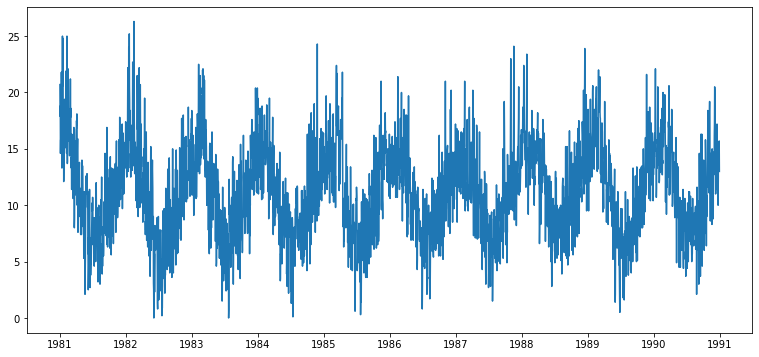

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=13,6 #매트랩 차트의 기본 크기 13,6 지정

#시계열 데이터 차트로 그려봄
plt.plot(ts1)

In [8]:
#분석 들어가기 전 결측치 유무 확인
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

1. 결측치가 있는 데이터를 모두 삭제(drop)

2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식

Series([], Name: Temp, dtype: float64)


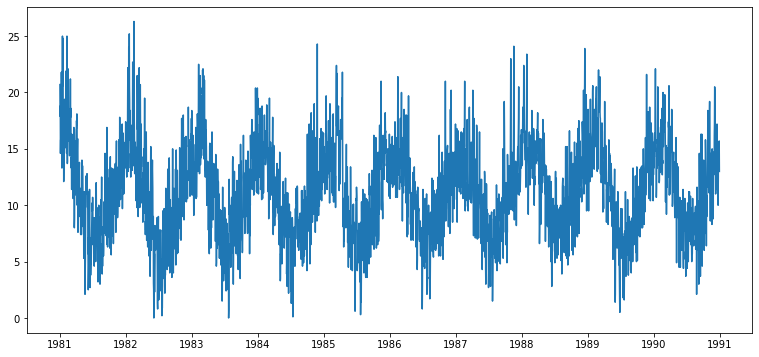

In [9]:
#결측치가 있다면 보간, 보간 기준은 time
ts1=ts1.interpolate(method='time')

#보간 이후 결측치 유무 다시 확인
print(ts1[ts1.isna()])

#다시 그래프 확인
plt.plot(ts1)

구간 통계치(Rolling Statistics)를 시각화
현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이

구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 시각화

In [12]:
def plot_rolling_statistics(timeseries,window=12):
    
    rolmean=timeseries.rolling(window=window).mean() #이동평균 시계열
    rolstd=timeseries.rolling(window=window).std() #이동표준편차 시계열
    
    #원본 시계열, 이동평균, 이동표준편차 시각화
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

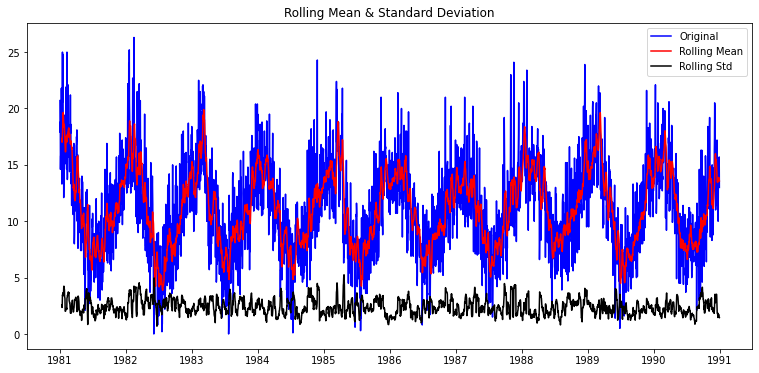

In [13]:
plot_rolling_statistics(ts1, window=12)

 International airline passengers 데이터셋
 월별 항공 승객 수(천명 단위)의 시계열 데이터

In [14]:
dataset_filepath = os.getcwd()+'/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


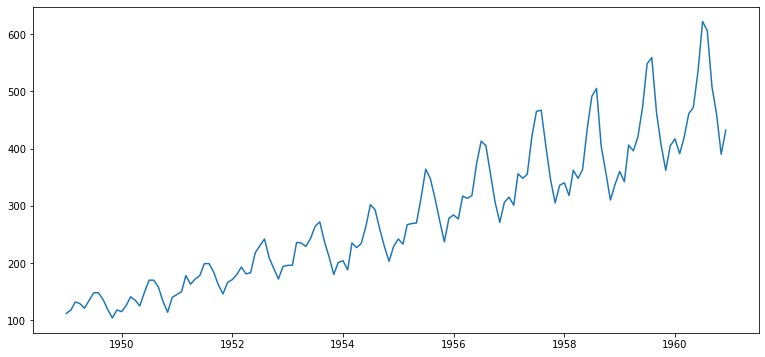

In [15]:
ts2 = df['Passengers']
plt.plot(ts2)

시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴

### 귀무가설 대립가설 p-value

주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,

통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에

이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다

#### statsmodels 패키지
R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지

패키지에서 제공하는 adfuller 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행

ADF 검정의 귀무가설 
DF 검정과 귀무가설이 같으므로 검정통계량이 Critical Value보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열 데이터

In [16]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    #패키지에서 제공하는 adfuller 메서드 호출
    dftest=adfuller(timeseries,autolag='AIC')
    
    #adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Dickey-Fuller Test:')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p_value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행

In [17]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p_value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


p-value가 거의 0에 가ㅏㄲㅂ게 나타남

In [18]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p_value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.

이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

### Stationary하게 만들 방법은 없을까?

- 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도

- 시계열 분해(Time series decomposition) 기법을 적용

#### 보다 Stationary한 시계열로 가공해 가기

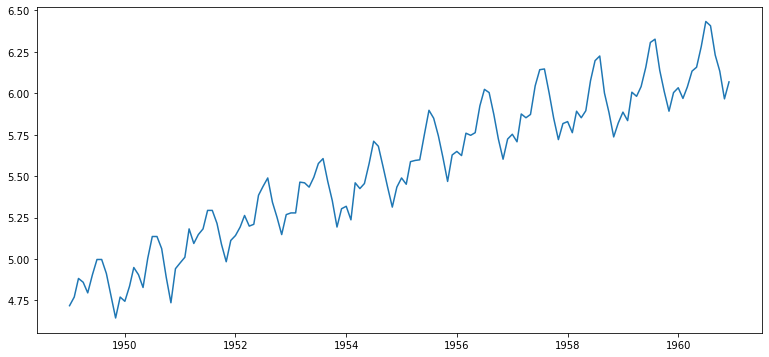

In [19]:
#로그함수 변환
ts_log=np.log(ts2)
plt.plot(ts_log)

In [20]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p_value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들
분산도 일정해짐, 하지만 시간 추이에 따른 평균이 계속 증가한다는 점

#### 추세(trend) : 시간 추이에 따라 나타나는 평균값 변화

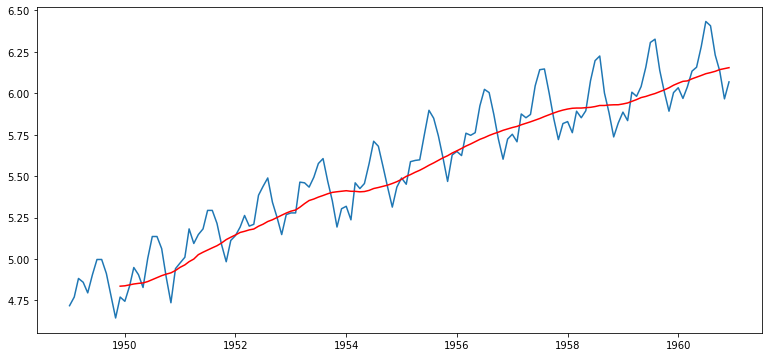

In [21]:
#추세 제거해주기 위해 거꾸로 이동평균을 구해 ts_log에서 제거

moving_avg=ts_log.rolling(window=12).mean() #이동평균 구하기
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [22]:
ts_log_moving_avg=ts_log- moving_avg #변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [23]:
#nan 값 제거 , 이동평ㄱㄴ 계산 시 앞의 11개의 데이터는 이동편균이 계산되지 않음

ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

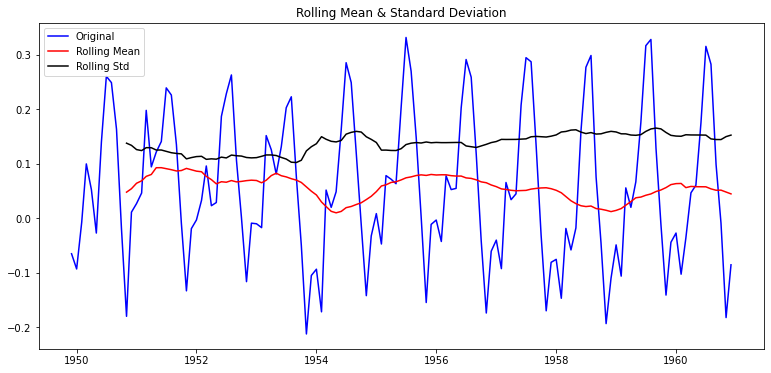

In [24]:
plot_rolling_statistics(ts_log_moving_avg)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p_value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다

 Moving Average를 계산하는 window=12로 정확하게 지정 
 
wiindow를 6으로 지정 시 p-value가 올라감

#### 차분(Differencing) - 계절성(Seasonality) 상쇄하기
Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소, 주기적 패턴을 계절성이랗 함

- 페턴 상쇄를 위해 차분 
- 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에서 뺴줌 -> 현재 스텝 값- 직접 스텝값